###  Hybrid Quantum Error Correction Techniques - Low-Density Parity-Check (LDPC) codes

In the fast-paced world of quantum computing, one of the most pressing challenges is ensuring the accuracy and reliability of quantum computations. The quantum realm is inherently fragile; quantum states are susceptible to errors due to a variety of factors, including decoherence, gate imperfections, and other sources of quantum noise. As quantum computers grow in scale and complexity, these errors pose a significant barrier to realizing the full potential of quantum technology. This is where Quantum Error Correction (QEC) comes into play, offering a means to protect quantum information and enable fault-tolerant quantum computing.

Among the various QEC strategies being explored, hybrid approaches that combine different types of error correction codes are emerging as particularly promising. A notable example of this is the integration of the Surface Code with quantum Low-Density Parity-Check (LDPC) codes. The Surface Code is widely recognized for its topological properties, which allow it to detect and correct local errors with high efficiency. However, one of its drawbacks is the substantial overhead it requires in terms of the number of physical qubits needed to encode a single logical qubit. On the other hand, quantum LDPC codes are known for their ability to correct sparse errors with relatively low overhead. By combining these two methods, a hybrid approach can achieve robust error correction while optimizing the use of computational resources.

The advantages of such hybrid QEC techniques are manifold. First and foremost, they provide enhanced protection against a broader spectrum of errors. While the Surface Code excels at handling local errors, its performance can be further bolstered by integrating it with LDPC codes, which can address more complex error patterns that may arise in large-scale quantum systems. This combination not only improves error correction but also enhances the scalability of quantum computing systems, making them more feasible for practical applications as they grow in size and complexity.

Scalability is, indeed, a critical factor as quantum processors continue to expand. As the number of qubits increases, so too does the complexity of maintaining error-free operations. Hybrid QEC techniques offer a scalable solution by leveraging the strengths of different codes to handle a wider variety of error types. This makes them particularly well-suited for larger and more sophisticated quantum systems, where the demands on error correction are significantly higher.

Another significant advantage of hybrid QEC techniques is their potential to increase the fault tolerance of quantum computers. Fault tolerance is the ability of a quantum computer to continue operating correctly even in the presence of errors. By combining the Surface Code with LDPC codes, it may be possible to lower the error thresholds that current quantum computers can tolerate, thereby making them more robust and reliable even in the noisy intermediate-scale quantum (NISQ) era we find ourselves in today.

Currently, research into hybrid QEC techniques is still in its early stages, but it is gaining momentum as quantum computing hardware continues to improve. Experimental implementations are being explored by both academic institutions and industry leaders, with early results showing great promise in achieving higher fidelity in quantum operations. Companies such as IBM and Google, along with leading academic research groups, are actively investigating these hybrid approaches, recognizing their potential to overcome some of the limitations of existing QEC methods.

While practical implementations of hybrid QEC on physical quantum devices are still being developed, simulations have already demonstrated that these codes can outperform traditional QEC methods in specific scenarios, particularly when dealing with more complex error landscapes. Ongoing work in this area is focused on optimizing the balance between error correction capability, resource overhead, and computational complexity—a challenging yet crucial task for the future of quantum computing.

Looking ahead, the development of hybrid QEC techniques is expected to play a pivotal role in the transition from NISQ devices to fully fault-tolerant quantum computers. Future research will likely concentrate on refining these hybrid methods, developing new combinations of QEC codes, and testing their effectiveness on increasingly sophisticated quantum hardware. The integration of hybrid QEC into quantum computing systems could also lead to more efficient quantum algorithms and applications, enabling breakthroughs in areas ranging from cryptography to material science, where the need for precise and reliable quantum computations is critical.

Moreover, as quantum networks begin to take shape, the robustness provided by hybrid QEC techniques will be essential for ensuring the integrity of quantum information transmitted over long distances. As quantum networks expand, the ability to correct errors across distributed quantum systems will become increasingly important, and hybrid QEC approaches are likely to provide the necessary resilience.

In conclusion, hybrid Quantum Error Correction techniques represent a significant step forward in the quest for fault-tolerant quantum computing. By combining the strengths of different QEC codes, such as the Surface Code and quantum LDPC codes, these hybrid approaches offer a pathway to more resilient and scalable quantum systems. Although challenges remain, the ongoing research and development in this area are laying the groundwork for the next generation of quantum technologies. As the field progresses, hybrid QEC techniques may well become a cornerstone of practical and widespread quantum computing, unlocking new possibilities across a wide range of applications. The future of quantum computing is bright, and hybrid QEC is poised to be a key component in realizing its full potential..

In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import  Statevector
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Quantum Error Correction Code Simulation - Conceptual Implementation

# Step 1: Define the quantum circuit for a simplified LDPC-like code
n_qubits = 5
qc = QuantumCircuit(n_qubits, n_qubits)

In [3]:
# Step 2: Apply some gates to create a simple error correction code

# Example: Prepare an encoded state
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.cx(0, 1)  # Entangle qubit 0 with qubit 1 (parity check)
qc.cx(0, 2)  # Entangle qubit 0 with qubit 2 (another parity check)
qc.cx(1, 3)  # Entangle qubit 1 with qubit 3
qc.cx(2, 4)  # Entangle qubit 2 with qubit 4

In [4]:
# Step 3: Simulate an error by applying an X gate (bit-flip error)
qc.x(1)  # Apply X gate to qubit 1 to simulate an error

In [5]:
# Step 4: Apply parity checks (syndrome measurements)
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(1, 3)
qc.cx(2, 4)

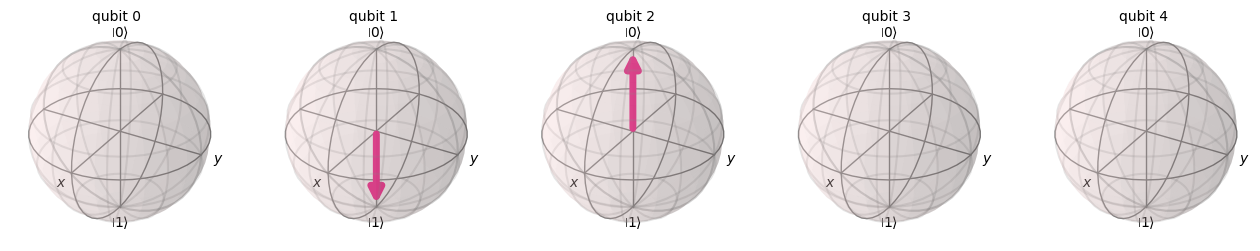

In [6]:
# Get the statevector before measurement and plot on Bloch spheres
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)
plt.show()

In [7]:
# Step 5: Measure all qubits
qc.measure(range(n_qubits), range(n_qubits))

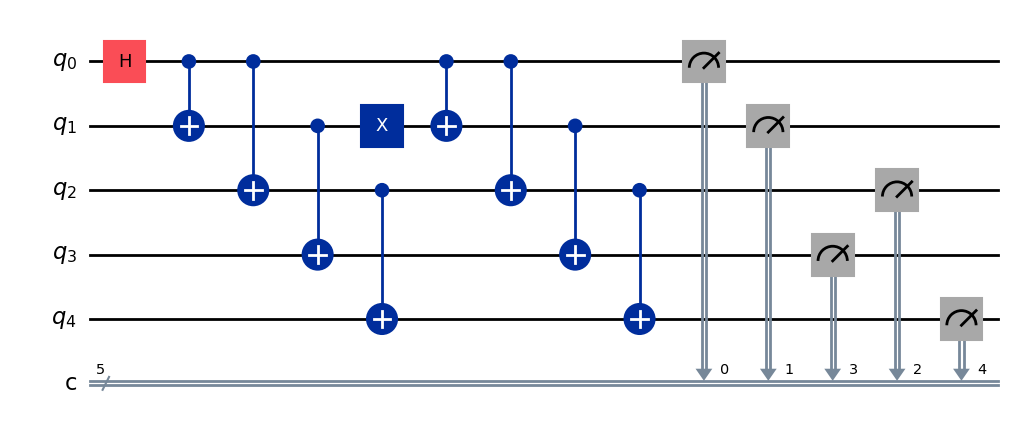

In [8]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [9]:
# Step 6: Transpile and simulate the circuit using Qiskit's AerSimulator
simulator = AerSimulator()
compiled_qc = transpile(qc, simulator)
qobj = assemble(compiled_qc)
result = simulator.run(qobj).result()

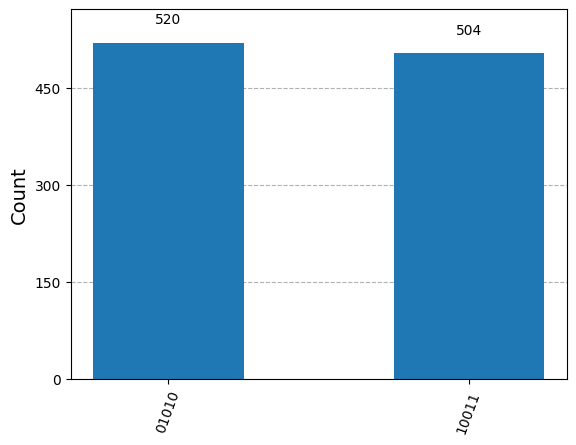

In [10]:
# Step 7: Extract and plot the measurement results
counts = result.get_counts(compiled_qc)
plot_histogram(counts)
plt.show()